In [ ]:
import keras
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import copy
import numpy
import pandas
csv = pandas.read_csv('./data/training_frames_keypoints.csv')
train_x = []
train_y = []
for index, row in csv.iterrows():
    f = mpimg.imread("./data/training/"+row["Unnamed: 0"])
    saved = f.shape
    img = cv2.cvtColor(f, cv2.COLOR_BGRA2BGR)
    img = cv2.normalize(img, None, alpha = 0, beta = 1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    img/=256
#     img = cv2.resize(img, (300,300))
    train_x.append(img)
    key_points = row.values[1:].reshape(-1, 136)[0]
    train_y.append(key_points)

import copy
data = {
    'train_x': train_x,
    'train_y':train_y
}

df = pandas.DataFrame(copy.copy(data), columns = ['train_x', 'train_y'])

import random

class DataGenerator(keras.utils.Sequence):
    def __init__(self, df, x_col, y_col, batch_size=16, num_classes=None, shuffle=True):
        self.batch_size = batch_size
        self.df = copy.copy(df)
        self.indices = self.df.index.tolist()
        self.num_classes = num_classes
        self.shuffle = shuffle
        self.x_col = x_col
        self.y_col = y_col
        self.on_epoch_end()

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, index):
        index = self.index[index:index+self.batch_size]
        batch = [self.indices[k] for k in index]

        X, y = self.__get_data(batch)
        return X, y

    def on_epoch_end(self):
        self.index = numpy.arange(len(self.indices))
        if self.shuffle == True:
            numpy.random.shuffle(self.index)

    def __get_data(self, batch):
        X = []
        y = []

        for i, id in enumerate(batch):
            randX = random.randint(-4, 4)
            randY = random.randint(-4, 4)
            label = copy.copy(self.df[self.y_col][id])
            img = copy.copy(self.df[self.x_col][id])
            randAngle = random.randint(-4, 4)
            zoomXRange = random.randint(-4, 4)
            zoomYRange = random.randint(-4, 4)

            if(random.choice([True, False])):
                img = cv2.flip(img, 1)
                label = label.reshape(-1, 2)

                temp = copy.copy(label[0])
                label[0] = label[16]
                label[16] = temp
                temp = copy.copy(label[1])
                label[1] = label[15]
                label[15] = temp
                temp = copy.copy(label[2])
                label[2] = label[14]
                label[14] = temp
                temp = copy.copy(label[3])
                label[3] = label[13]
                label[13] = temp
                temp = copy.copy(label[4])
                label[4] = label[12]
                label[12] = temp
                temp = copy.copy(label[5])
                label[5] = label[11]
                label[11] = temp
                temp = copy.copy(label[6])
                label[6] = label[10]
                label[10] = temp
                temp = copy.copy(label[7])
                label[7] = label[9]
                label[9] = temp


                temp = copy.copy(label[17])
                label[17] = label[26]
                label[26] = temp
                temp = copy.copy(label[18])
                label[18] = label[25]
                label[25] = temp
                temp = copy.copy(label[19])
                label[19] = label[24]
                label[24] = temp
                temp = copy.copy(label[20])
                label[20] = label[23]
                label[23] = temp
                temp = copy.copy(label[21])
                label[21] = label[22]
                label[22] = temp


                temp = copy.copy(label[36])
                label[36] = label[45]
                label[45] = temp
                temp = copy.copy(label[37])
                label[37] = label[44]
                label[44] = temp
                temp = copy.copy(label[38])
                label[38] = label[43]
                label[43] = temp
                temp = copy.copy(label[39])
                label[39] = label[42]
                label[42] = temp
                temp = copy.copy(label[40])
                label[40] = label[47]
                label[47] = temp
                temp = copy.copy(label[41])
                label[41] = label[46]
                label[46] = temp

                temp = copy.copy(label[31])
                label[31] = label[35]
                label[35] = temp
                temp = copy.copy(label[32])
                label[32] = label[34]
                label[34] = temp

                temp = copy.copy(label[48])
                label[48] = label[54]
                label[54] = temp
                temp = copy.copy(label[49])
                label[49] = label[53]
                label[53] = temp
                temp = copy.copy(label[50])
                label[50] = label[52]
                label[52] = temp
                temp = copy.copy(label[60])
                label[60] = label[64]
                label[64] = temp
                temp = copy.copy(label[61])
                label[61] = label[63]
                label[63] = temp


                temp = copy.copy(label[67])
                label[67] = label[65]
                label[65] = temp
                temp = copy.copy(label[59])
                label[59] = label[55]
                label[55] = temp
                temp = copy.copy(label[58])
                label[58] = label[56]
                label[56] = temp
                height, width = img.shape[:2]

                label[:, 0] = width - label[:, 0]

                label = label.reshape(-1, 136)[0]

            height, width = img.shape[:2]

            hm = (randX*0.01*height)
            wm = (randY*0.01*width)
            for k in range(136):
                if(k%2 == 0):
                    if(randX<0):
                        label[k] += hm
                    else:
                        label[k] += hm
                else:
                    if(randY<0):
                        label[k] += wm
                    else:
                        label[k] += wm

#             print(img_centre)
                
            T = numpy.float32([[1,0,hm],[0,1,wm]])
            image = cv2.warpAffine(img, T, (height,width))


            height, width = image.shape[:2]


            label = label.reshape(-1, 2)

            img_centre = tuple(numpy.array(image.shape[1::-1]) / 2)
            rot_mat = cv2.getRotationMatrix2D(img_centre, randAngle, 1)
            result_img = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_AREA)
            label[:, 0] -= img_centre[0]
            label[:, 1] -= img_centre[1]

            s = numpy.sin(numpy.deg2rad(-randAngle))
            c = numpy.cos(numpy.deg2rad(-randAngle))
            
            xNew = label[:, 0] * c - label[:, 1] * s
            yNew = label[:, 0] * s + label[:, 1] * c

            label[:, 0] = xNew + img_centre[0]
            label[:, 1] = yNew + img_centre[1]

            final_label = label.reshape(-1, 136)[0]

            saved = result_img.shape
#             print(saved)

            result_img = cv2.resize(result_img, (300,300), interpolation = cv2.INTER_AREA)

            final_label = final_label.reshape(-1, 2)
            final_label[:, 0] = (final_label[:, 0]/saved[1])*300
            final_label[:, 1] = (final_label[:, 1]/saved[0])*300

            X.append(result_img)
            final_label = final_label.reshape(-1, 136)[0]
            y.append(final_label)
        X = numpy.array(X, dtype="float32")
        y = numpy.array(y, dtype="float32")
        return X, y

gen = DataGenerator(copy.copy(df), 'train_x', 'train_y', 8)

In [ ]:
first = gen[56]
plt.imshow(first[0][7]*256)
key_points = first[1][7].reshape(-1, 2)
plt.scatter(key_points[:, 0], key_points[:, 1], marker='.', c='m')

In [4]:
pip install tensorflow-gpu

  Using cached tensorflow_gpu-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Angad\\anaconda3\\Lib\\site-packages\\tensorflow\\lite\\experimental\\microfrontend\\python\\ops\\_audio_microfrontend_op.so'
Consider using the `--user` option or check the permissions.



In [5]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')

if(gpus):
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
import keras

from keras.layers import *
from keras.optimizers import *
from keras.applications import *
from keras.models import Model
from keras_vggface.vggface import VGGFace

vgg_model = VGGFace(include_top=False, input_shape=(224, 224, 3))

# base_model = keras.applications.MobileNetV2(
#     weights='imagenet',
#     input_shape=(160,160, 3),
#     include_top=False)
# Freeze base model
for layer in vgg_model.layers:
    layer.trainable = False

inputs = keras.Input(shape=(224, 224, 3))
x = vgg_model.output
x = GlobalAveragePooling2D()(x)

x2 = Dense(512, activation='relu')(x)

x = Dropout(0.03)(x2)

x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)

predictions = Dense(136)(x)

# add your top layer block to your base model
model = Model(vgg_model.input, predictions)
print(model.summary())


ImportError: You need to first `import keras` in order to use `keras_applications`. For instance, you can do:

```
import keras
from keras_applications import vgg16
```

Or, preferably, this equivalent formulation:

```
from keras import applications
```


In [3]:
model.load_weights("training_9_1.ckpt")

(372, 368, 4)
(372, 368, 4)


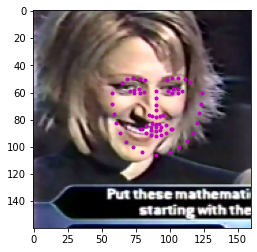

In [22]:
import os
import pandas
import matplotlib.image as mpimg
import cv2
import matplotlib.pyplot as plt
import copy
import numpy as np

files_path = [os.path.relpath(x) for x in os.listdir('./data/training/')]
csv = pandas.read_csv('./data/training_frames_keypoints.csv')
# print(files_path98
file = files_path[1024]
f = mpimg.imread("./data/training/"+file)
print(f.shape)
saved = f.shape
print(saved)
img = cv2.resize(f, (160,160))
img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
plt.imshow(img)
image = copy.copy(np.expand_dims(img, axis=0))
image = cv2.normalize(image, None, alpha = 0, beta = 1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
image/=256
key_points = model.predict_on_batch(image).reshape(-1, 2)
plt.scatter(key_points[:, 0], key_points[:, 1], marker='.', c='m')